## PLOTS for report 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil import relativedelta
import time
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
plt.set_cmap('bone')
import seaborn as sns
from geopy import distance
from sklearn.cluster import DBSCAN
import time
import re
import folium
from matplotlib.ticker import MaxNLocator
from tqdm.notebook import tqdm
from IPython.display import display
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats
from scipy.stats import ttest_ind
import math

cmap = plt.cm.bone
import warnings
warnings.filterwarnings('ignore')

<Figure size 432x288 with 0 Axes>

#### Last data: 

In [2]:
lastdata = '11052021'

#### Data imports 

In [3]:
df = pd.read_csv('df_' + lastdata + '.csv')
df = df.drop(columns = 'Unnamed: 0')
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

df.head(1)

,Station Name,MAC Address,Start Date,End Date,Total Duration (mins),Charging Time (mins),Energy (kWh),Port Number,Plug Type,Latitude,Longitude,Fee (USD),Label,CenterLat,CenterLon
0,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,2011-07-29 20:17:00,2011-07-29 23:20:00,183.533333,114.05,6.249457,2,J1772,37.444572,-122.160309,0.0,2,37.444544,-122.160258


In [4]:
plugdf = pd.read_csv('plugdf_' + lastdata + '.csv')
plugdf = plugdf.rename(columns = {'Unnamed: 0': 'Date'})
plugdf['Date'] = pd.to_datetime(plugdf['Date'])
plugdf = plugdf.set_index('Date')
#p2 = p2.drop(columns = 'Unnamed: 0')
plugdf.head()

,Label,Plugs_raw,Number of NEMA 5-20R_raw,Plugs,Number of NEMA 5-20R
Date,,,,,
2011-10-10,0,2.0,1.0,2.0,1.0
2011-10-11,0,2.0,1.0,2.0,1.0
2011-10-12,0,2.0,1.0,2.0,1.0
2011-10-13,0,4.0,2.0,4.0,2.0
2011-10-14,0,4.0,2.0,4.0,2.0


In [5]:
df_days_with_external = pd.read_csv('df_days_with_external_' + lastdata + '.csv')
df_days_with_external['Date'] = pd.to_datetime(df_days_with_external['Date'])

df_days_with_external = df_days_with_external.set_index('Date')


df_days_with_external.head(1)

,Label,Charging Time (mins),Parking Time (mins),Energy (kWh),Fee (USD),# Food,# Shop & Service,# Professional & Other Places,# Nightlife Spot,# Outdoors & Recreation,...,Year_Month_6,Year_Month_7,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12,Holiday,Days_previous_holiday,Days_next_holiday
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,2,114.05,183.533333,6.249457,0.0,127.0,99.0,86,87.0,82,...,0,1,0,0,0,0,0,0,25,38


In [6]:
def get_until_not_zero(df):

    index = df[df["Energy (kWh)"] != 0].index[0]

    df = df.loc[index:]

    return df

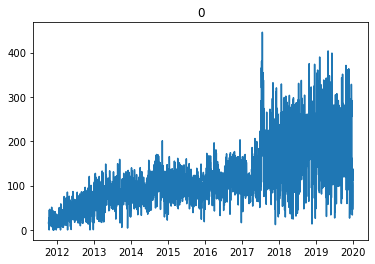

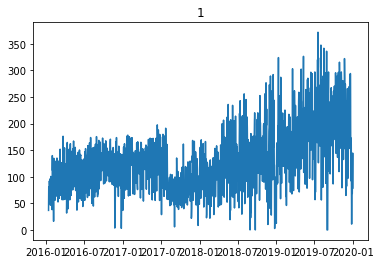

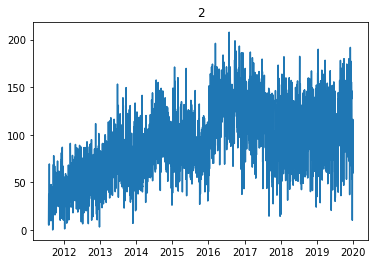

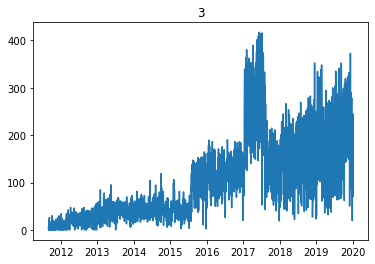

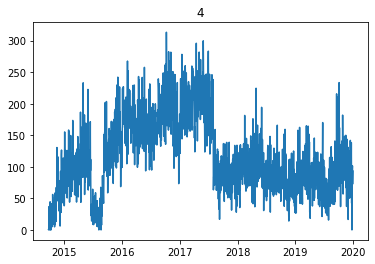

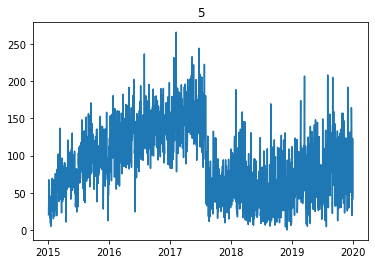

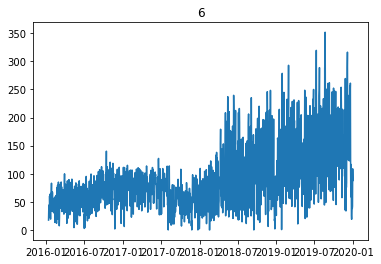

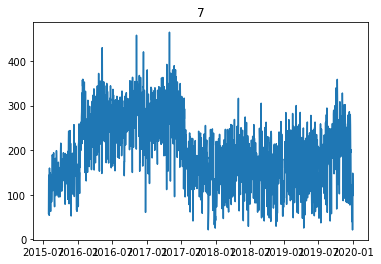

In [7]:
for c in range(8): 
    dfcl = df_days_with_external[df_days_with_external['Label'] == c]
    dfcl = get_until_not_zero(dfcl)
    plt.plot(dfcl.index, dfcl['Energy (kWh)'])
    plt.title(c)
    
    plt.show()

# PLOTS!

### Plots for individual chargings

## D ~ Charging Time (Colored by Plug Type)

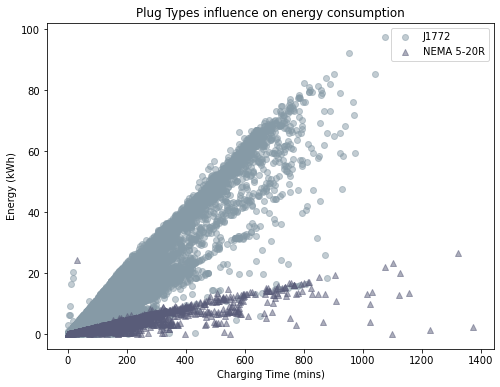

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df[df['Plug Type'] == 'J1772']['Charging Time (mins)'], df[df['Plug Type'] == 'J1772']['Energy (kWh)'], color = cmap(0.6), alpha = 0.5, label = 'J1772', marker = 'o')
plt.scatter(df[df['Plug Type'] == 'NEMA 5-20R']['Charging Time (mins)'], df[df['Plug Type'] == 'NEMA 5-20R']['Energy (kWh)'], color = cmap(0.4), alpha = 0.5, label = 'NEMA 5-20R', marker = "^")
plt.legend() 
plt.title('Plug Types influence on energy consumption')
plt.ylabel('Energy (kWh)')
plt.xlabel('Charging Time (mins)')


plt.show()

## Distribution of Energy (kWh) 

In [9]:
#Removing all 0 (Before start) 
df1 = pd.DataFrame()
for c in range(8): 
    dfcl = df_days_with_external[df_days_with_external['Label'] == c]
    dfcl = get_until_not_zero(dfcl)
    
    df1 = pd.concat([df1, dfcl])


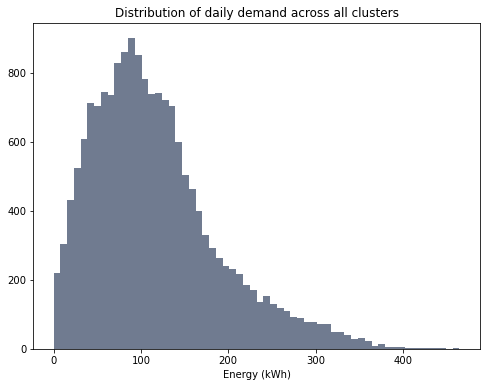

In [10]:
plt.rcParams['figure.figsize'] = [8, 6]

plt.hist(df1['Energy (kWh)'], bins = 60, color = cmap(0.5))
plt.title('Distribution of daily demand across all clusters')
plt.xlabel('Energy (kWh)')
plt.show()

## Energy (kWh) ~ Time variables

In [11]:
#colors2 = ['red', 'orange', 'gray', 'green', 'darkblue', 'blue', 'purple', 'black']
#
#for d in range(7): 
#    dfd = df1[df1[f"Week_Day_{d}"] == 1]
#    
#    
#    for c in range(8): 
#        dfdc = dfd[dfd['Label'] == c]
#        clustermean_forday = dfdc['Energy (kWh)'].mean() 
#        
#        plt.scatter(d, clustermean_forday, color = colors2[c])
#plt.show()

#### Weekday

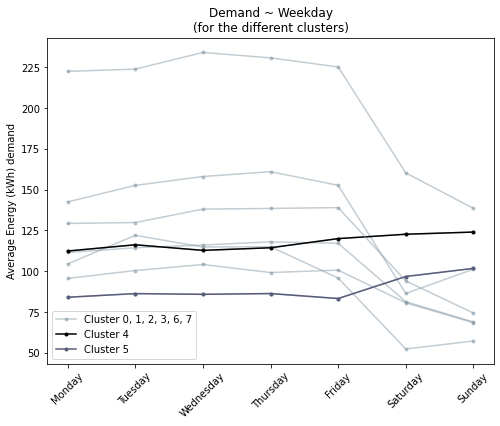

In [30]:
colors2 = ['red', 'orange', 'gray', 'green', 'darkblue', 'blue', 'purple', 'black']
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for c in range(8): 
    dfc = df1[df1['Label'] == c] #df1[df1[f"Week_Day_{d}"] == 1]
    
    allmeans = []
    for d in range(7): 
        dfcd = dfc[dfc[f"Week_Day_{d}"] == 1]
        clustermean_forday = dfcd['Energy (kWh)'].mean() 
        allmeans.append(clustermean_forday)
        #plt.scatter(d, clustermean_forday, color = colors2[c])
    if c == 4: 
        plt.plot(week, allmeans, linestyle = '-', marker = '.', color = cmap(0), zorder= 1, label = f"Cluster {c}")
        
    if c == 5: 
        plt.plot(week, allmeans, linestyle = '-', marker = '.', color = cmap(0.4), zorder= 1, label = f"Cluster {c}")
    if c == 0: 
        plt.plot(week, allmeans, linestyle = '-', marker = '.', color = cmap(0.6), zorder = 2, alpha = 0.5, label = "Cluster 0, 1, 2, 3, 6, 7")
    else: 
        plt.plot(week, allmeans, linestyle = '-', marker = '.', color = cmap(0.6), zorder = 0, alpha = 0.5)
plt.legend()
plt.xticks(rotation = 45)
plt.ylabel("Average Energy (kWh) demand")
plt.title('Demand ~ Weekday\n(for the different clusters)')
plt.show()

#### Month

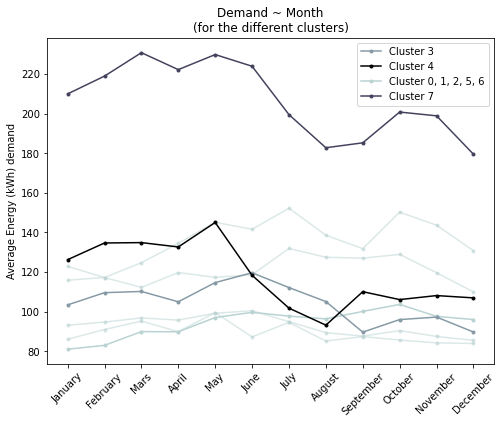

In [34]:
colors2 = ['red', 'orange', 'gray', 'green', 'darkblue', 'blue', 'purple', 'black']
months = ['January', 'February', 'Mars', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for c in range(8): 
    dfc = df1[df1['Label'] == c] #df1[df1[f"Week_Day_{d}"] == 1]
    
    allmeans = []
    for m in range(1,13): 
        dfcm = dfc[dfc[f"Year_Month_{m}"] == 1]
        clustermean_formonth = dfcm['Energy (kWh)'].mean() 
        allmeans.append(clustermean_formonth)
        
    #plt.plot(months, allmeans, linestyle = '-', marker = '.', color = colors2[c], zorder = 0, alpha = 0.5, label = f"Cluster {c}")
        #plt.scatter(d, clustermean_forday, color = colors2[c])
    if c == 6: 
        plt.plot(months, allmeans, linestyle = '-', marker = '.', color = cmap(0.8), zorder= 0, label = f"Cluster 0, 1, 2, 5, 6")   
    elif c == 7: 
        plt.plot(months, allmeans, linestyle = '-', marker = '.', color = cmap(0.3), zorder= 3, label = f"Cluster {c}")
    elif c == 3: 
        plt.plot(months, allmeans, linestyle = '-', marker = '.', color = cmap(0.6), zorder= 3, label = f"Cluster {c}")
    elif c == 4: 
        plt.plot(months, allmeans, linestyle = '-', marker = '.', color = cmap(0), zorder= 3, label = f"Cluster {c}")

    else: 
        plt.plot(months, allmeans, linestyle = '-', marker = '.', color = cmap(0.8), zorder = 0, alpha = 0.5)
plt.legend()
plt.ylabel("Average Energy (kWh) demand")
plt.xticks(rotation = 45)
plt.title('Demand ~ Month\n(for the different clusters)')
plt.show()

#### Month day

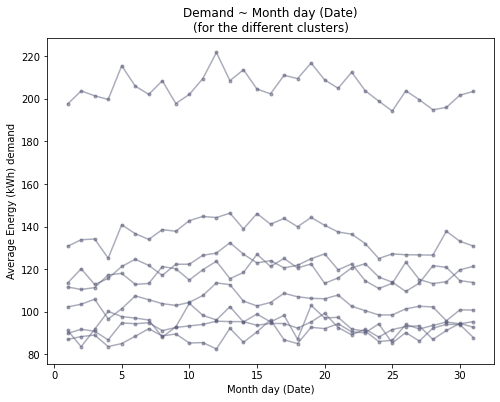

In [14]:
colors2 = ['red', 'orange', 'gray', 'green', 'darkblue', 'blue', 'purple', 'black']
months = ['January', 'February', 'Mars', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthdays = range(1,32)

for c in range(8): 
    dfc = df1[df1['Label'] == c] #df1[df1[f"Week_Day_{d}"] == 1]
    
    allmeans = []
    for m in monthdays: 
        dfcm = dfc[dfc[f"Month_Day_{m}"] == 1]
        clustermean_formonthday = dfcm['Energy (kWh)'].mean() 
        allmeans.append(clustermean_formonthday)
        
    plt.plot(monthdays, allmeans, linestyle = '-', marker = '.', color = cmap(0.4), zorder = 0, alpha = 0.5)
        #plt.scatter(d, clustermean_forday, color = colors2[c])

plt.ylabel("Average Energy (kWh) demand")
plt.xlabel("Month day (Date)")
#plt.xticks(rotation = 45)
plt.title('Demand ~ Month day (Date)\n(for the different clusters)')
plt.show()

#### Holidays 

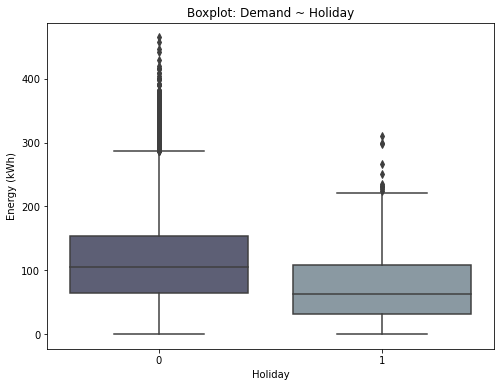

In [15]:
my_pal = {1: cmap(0.6), 0: cmap(0.4)}

sns.boxplot(x='Holiday', y='Energy (kWh)', data = df1,  palette = my_pal)
plt.title('Boxplot: Demand ~ Holiday')
plt.show()

In [16]:
t_stat, p = ttest_ind(df1[df1['Holiday'] == 1]['Energy (kWh)'], df1[df1['Holiday'] == 0]['Energy (kWh)'])
print(f't={t_stat}, p={p}')

t=-12.040880437654865, p=2.938009020210576e-33


In [17]:
#dfHOL = df1.copy() 
#dfHOL['Days away from Holiday < 3'] = 0 
#dfHOL['Days away from Holiday < 3'][(dfHOL['Days_previous_holiday'] < 3) | (dfHOL['Days_next_holiday'] < 3)] = 1
#my_pal = {1: cmap(0.8), 0: cmap(0.2)}
#
#sns.boxplot(x='Days away from Holiday < 3', y='Energy (kWh)', data = dfHOL,  palette = my_pal)
#plt.show()

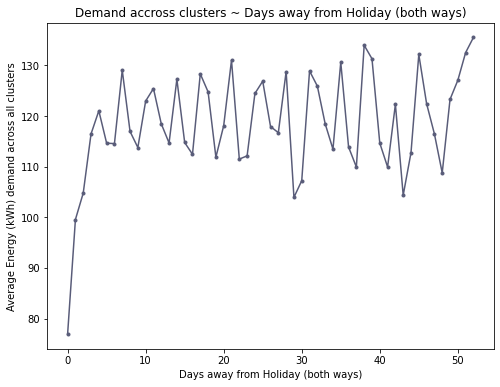

In [18]:
dfhol = df1.copy()
dfhol['Days away from Holiday'] = dfhol[['Days_previous_holiday', 'Days_next_holiday']].min(axis=1)
dfhol = dfhol[['Energy (kWh)', 'Days away from Holiday']]

meandf = dfhol.groupby('Days away from Holiday').mean()

plt.plot(meandf, marker = '.', color = cmap(0.4))
plt.ylabel('Average Energy (kWh) demand across all clusters')
plt.xlabel('Days away from Holiday (both ways)')
plt.title('Demand accross clusters ~ Days away from Holiday (both ways)')
plt.show()

## Fee and Plugs

In [21]:
df_days_with_external.columns

Index(['Label', 'Charging Time (mins)', 'Parking Time (mins)', 'Energy (kWh)',
       'Fee (USD)', '# Food', '# Shop & Service',
       '# Professional & Other Places', '# Nightlife Spot',
       '# Outdoors & Recreation', '# Arts & Entertainment',
       '# Travel & Transport', '# College & University', '# Event',
       '# Residence', 'Plugs_raw', 'Number of NEMA 5-20R_raw', 'Plugs',
       'Number of NEMA 5-20R', 'Label_0', 'Label_1', 'Label_2', 'Label_3',
       'Label_4', 'Label_5', 'Label_6', 'Label_7', 'Month_Day_1',
       'Month_Day_2', 'Month_Day_3', 'Month_Day_4', 'Month_Day_5',
       'Month_Day_6', 'Month_Day_7', 'Month_Day_8', 'Month_Day_9',
       'Month_Day_10', 'Month_Day_11', 'Month_Day_12', 'Month_Day_13',
       'Month_Day_14', 'Month_Day_15', 'Month_Day_16', 'Month_Day_17',
       'Month_Day_18', 'Month_Day_19', 'Month_Day_20', 'Month_Day_21',
       'Month_Day_22', 'Month_Day_23', 'Month_Day_24', 'Month_Day_25',
       'Month_Day_26', 'Month_Day_27', 'Month_Day_28

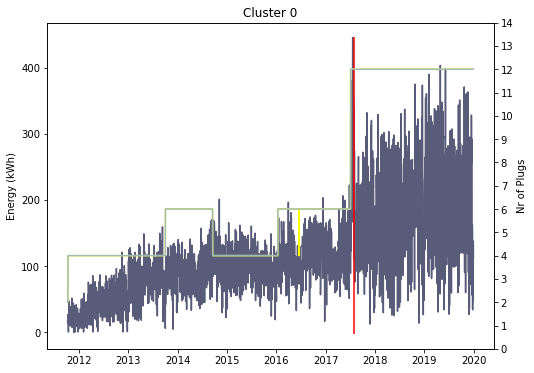

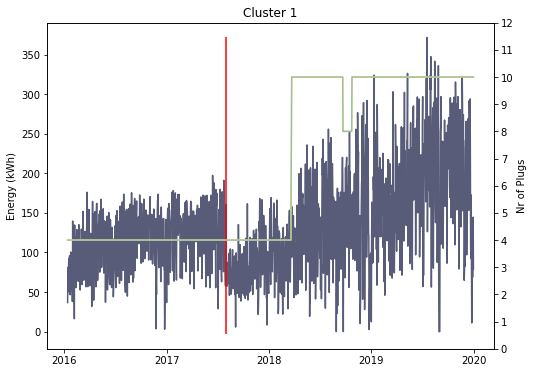

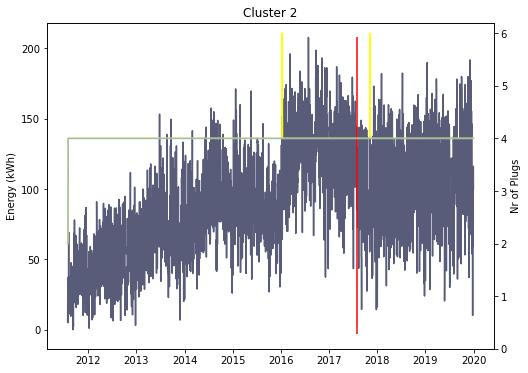

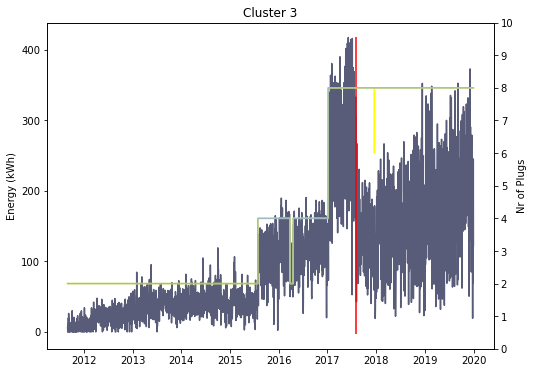

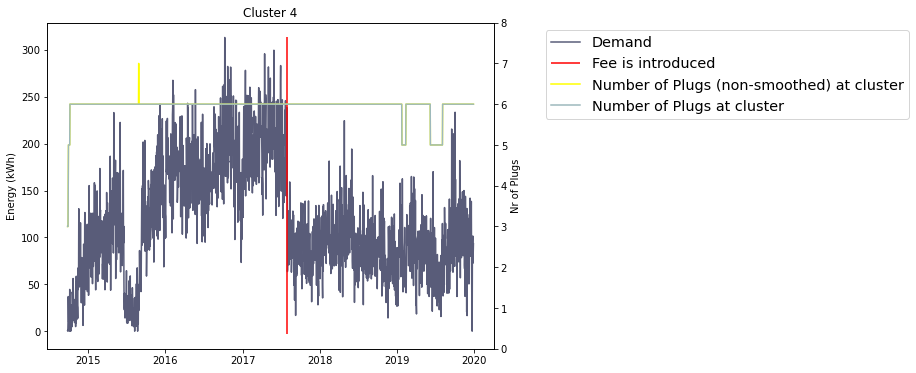

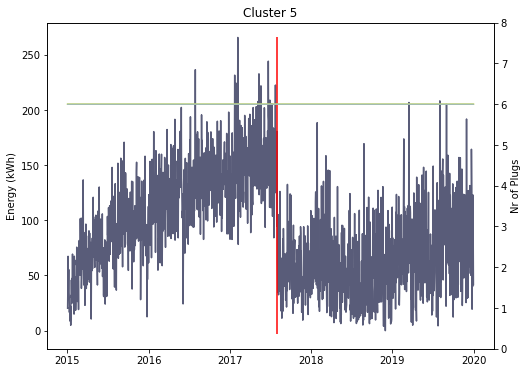

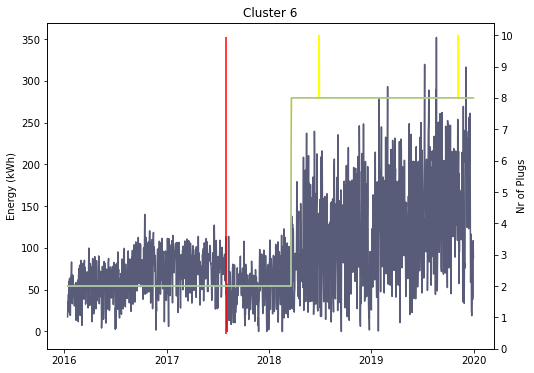

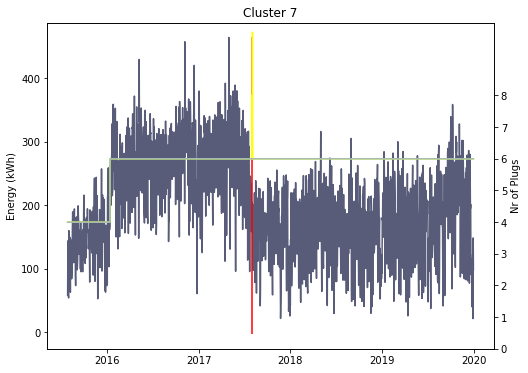

In [28]:
#plt.plot[ww[ww['Label'] == 0]['Energy (kWh)']]
#plt.show()
#la = 5


for la in range(len(df_days_with_external['Label'].unique())):
    dfla = df_days_with_external[df_days_with_external['Label'] == la]
    dftemp = dfla[(dfla['Energy (kWh)'] != 0).cumsum() > 0]
    dftemp.index = pd.to_datetime(dftemp.index)
    
    fig, ax = plt.subplots()
    
    
    
    #ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
    ax.plot(dftemp.index, dftemp['Energy (kWh)'], zorder=0, color = cmap(0.4), label = 'Demand')
    
    ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    ax.set_ylabel('Energy (kWh)')
    ax.vlines(dftemp[dftemp['Fee (USD)'] != 0].index.min(), ymin = -3, ymax = dftemp['Energy (kWh)'].max(), color = 'red', label="Fee is introduced")

    handlesax, labelsax = ax.get_legend_handles_labels()

    
    ax2 = ax.twinx() 
    #ax2.plot(dftemp.index, dftemp['Plugs'])
    ax2.plot(dftemp.index, dftemp['Plugs_raw'], color = 'yellow', label = 'Number of Plugs (non-smoothed) at cluster')

    ax2.plot(dftemp.index, dftemp['Plugs'], color = cmap(0.7), label = 'Number of Plugs at cluster')

    
    ax2.xaxis.set_major_locator(mdates.YearLocator(base=1))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    
    #ax2.plot(dftemp.index, dftemp['Number of NEMA 5-20R'], color = 'yellow')

    ax2.set_ylabel('Nr of Plugs')
    
    yint = range(0, math.ceil(max(dftemp['Plugs']))+3) #math.floor(min(dftemp['Plugs']))
    ax2.set_yticks(yint)
    
    ax2.title.set_text(f"Cluster {la}")
    handlesax2, labelsax2 = ax2.get_legend_handles_labels()

    #ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
    #((ww[ww['Label'] == la]['Energy (kWh)'] - ww[ww['Label'] == la]['Energy (kWh)'].mean())/ ww[ww['Label'] == la]['Energy (kWh)'].std()).plot(label = "Standardized consumption")
    #(ww[ww['Label'] == la]['Plugs']).plot(label = "Nr of plugs")
    #plt.vlines(ww[ww['Fee (USD)'] != 0].index.min(), ymin = -3, ymax = ww[ww['Label'] == la]['Plugs'].max(), color = 'red', label="Fee is introduced")
    #plt.title(f"Label: {la}")
    #plt.legend()
    handles = handlesax + handlesax2
    labels = labelsax + labelsax2
    
    if la == 4: 
        ax.legend(handles, labels, bbox_to_anchor=(1.1, 1), fontsize = 'x-large')
    
    plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

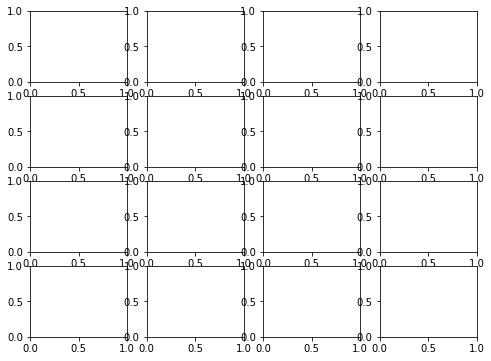

In [20]:
#plt.plot[ww[ww['Label'] == 0]['Energy (kWh)']]
#plt.show()
#la = 5

#figgi, axi = plt.subplots(4,4)

for la in range(len(df_days_with_external['Label'].unique())):
    dfla = df_days_with_external[df_days_with_external['Label'] == la]
    dftemp = dfla[(dfla['Energy (kWh)'] != 0).cumsum() > 0]
    dftemp.index = pd.to_datetime(dftemp.index)
    
    fig, ax = plt.subplots(4,4)
    
    
    
    #ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
    ax[la].plot(dftemp.index, dftemp['Energy (kWh)'], zorder=0, color = cmap(0.4), label = 'Demand')
    
    ax[la].xaxis.set_major_locator(mdates.YearLocator(base=1))
    ax[la].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    ax[la].set_ylabel('Energy (kWh)')
    ax[la].vlines(dftemp[dftemp['Fee (USD)'] != 0].index.min(), ymin = -3, ymax = dftemp['Energy (kWh)'].max(), color = 'red', label="Fee is introduced")

    handlesax, labelsax = ax[la].get_legend_handles_labels()

    
    ax2 = ax[la].twinx() 
    #ax2.plot(dftemp.index, dftemp['Plugs'])
    ax2.plot(dftemp.index, dftemp['Plugs'], color = cmap(0.7), label = 'Number of Plugs at cluster')

    ax2.xaxis.set_major_locator(mdates.YearLocator(base=1))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    
    #ax2.plot(dftemp.index, dftemp['Number of NEMA 5-20R'], color = 'yellow')

    ax2.set_ylabel('Nr of Plugs')
    
    yint = range(0, math.ceil(max(dftemp['Plugs']))+3) #math.floor(min(dftemp['Plugs']))
    ax2.set_yticks(yint)
    
    ax2.title.set_text(f"Cluster {la}")
    handlesax2, labelsax2 = ax2.get_legend_handles_labels()

    #ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
    #((ww[ww['Label'] == la]['Energy (kWh)'] - ww[ww['Label'] == la]['Energy (kWh)'].mean())/ ww[ww['Label'] == la]['Energy (kWh)'].std()).plot(label = "Standardized consumption")
    #(ww[ww['Label'] == la]['Plugs']).plot(label = "Nr of plugs")
    #plt.vlines(ww[ww['Fee (USD)'] != 0].index.min(), ymin = -3, ymax = ww[ww['Label'] == la]['Plugs'].max(), color = 'red', label="Fee is introduced")
    #plt.title(f"Label: {la}")
    #plt.legend()
    handles = handlesax + handlesax2
    labels = labelsax + labelsax2
    
    ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), )
    
plt.show()